# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [4]:
import torch
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [3]:
a = torch.FloatTensor(3, 4)
b = torch.FloatTensor(12)

In [6]:
c = b.view(2, 2, 3)

In [10]:
print(a)
print(a[:, 0])

tensor([[2.0875e-36, 3.0715e-41, 3.7835e-44, 0.0000e+00],
        [       nan, 3.0715e-41, 1.3733e-14, 6.4069e+02],
        [4.3066e+21, 1.1824e+22, 4.3066e+21, 6.3828e+28]])
tensor([2.0875e-36,        nan, 4.3066e+21])


### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [12]:
a = torch.FloatTensor(5, 2)
b = torch.FloatTensor(1, 10)

In [13]:
c = b.view(5, 2)

In [14]:
print("+", a.add(c))
print("-", a.sub(c))
print("*", a.mul(c))
print("/", a.div(c))

+ tensor([[6.2270e-36, 6.1430e-41],
        [6.7262e-44, 0.0000e+00],
        [       nan, 0.0000e+00],
        [8.9443e+21, 6.0209e+29],
        [1.4371e+23, 1.4502e+29]])
- tensor([[ 2.2959e-41,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [        nan,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -1.2222e+27]])
* tensor([[0., 0.],
        [0., 0.],
        [nan, 0.],
        [inf, inf],
        [inf, inf]])
/ tensor([[1.0000, 1.0000],
        [1.0000,    nan],
        [   nan,    nan],
        [1.0000, 1.0000],
        [1.0000, 0.9833]])


### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

In [36]:
images = torch.IntTensor(100, 200, 200, 3).zero_()

In [37]:
# white_line = [[255, 255, 255] for _ in range(images.shape[1])]
for i in range(images.shape[0]):
  images[i, i*2:(i+1)*2, :, :] = 255

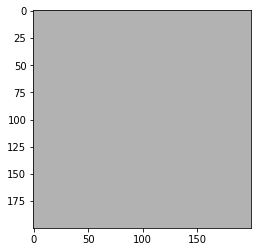

In [38]:
images_mean = torch.mean(images.float(), 0) * 70
# print(images_mean.int())
plt.imshow(images_mean.int())

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [2]:
from torch.autograd import Variable

In [7]:
a = torch.FloatTensor(2, 3, 4).cuda().uniform_()
b = torch.FloatTensor(1, 8, 3).cuda().uniform_()
c = b.view(2, 3, 4)
a = Variable(a.cpu())
c = Variable(c.cpu(), requires_grad=True)

In [8]:
L = torch.mean((c - a)**2)
L.backward()
c.grad

tensor([[[-0.0623,  0.0205, -0.0079, -0.0788],
         [-0.0112, -0.0056,  0.0601,  0.0366],
         [ 0.0559, -0.0108, -0.0009,  0.0148]],

        [[-0.0030,  0.0088, -0.0184,  0.0715],
         [ 0.0146,  0.0781,  0.0327,  0.0203],
         [ 0.0209, -0.0136, -0.0547,  0.0602]]])